In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2 as cv
from utils.io_utils import get_images, output_calib_results, draw_detections
from utils.calib_utils import detect_keypoints, get_calib_input, filter_orientation

WARNING - 2021-02-24 02:37:26,644 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-02-24 02:37:26,645 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-02-24 02:37:26,646 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
WARNING - 2021-02-24 02:37:26,647 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
T

In [3]:
pattern_size = (8, 6)
edge_length = 0.055
data_path = "/home/konstantin/datasets/bandeja-sequence/2021_02_23/samsung_chessboard_intrinsics/20210223_121055_chessboard_intrinsics"

In [4]:
images = get_images(data_path)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
len(images)

40

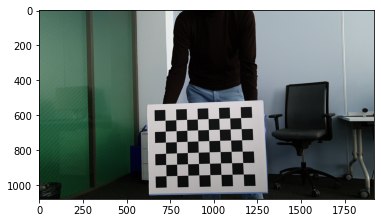

In [6]:
i=0
for key in images.keys():
    i=i+1
    if i==10:
        plt.imshow(images[key])

In [7]:
results = detect_keypoints(images, pattern_size, edge_length)

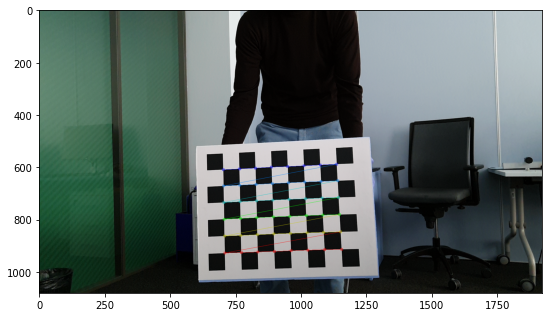

In [8]:
draw_detections(images, results, pattern_size, 10, normalize=True)

In [9]:
fresults = filter_orientation(results, pattern_size)

In [10]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.0001)

scene_points, loc_kp = get_calib_input(fresults)

shape = images[list(images.keys())[0]].shape[::-1][1:]

# Note: K3 dist. coeff. is set to zero, because ros requires 4 distortion parameters. Change if needed.
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, loc_kp, shape, None, None, flags=cv.CALIB_FIX_K3, criteria=criteria)

print(reproj_error)

0.6056007180447408


Intrinsics:
[[1.60279228e+03 0.00000000e+00 9.65398527e+02]
 [0.00000000e+00 1.60869052e+03 5.51780324e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
[[ 0.1023338  -0.1407371   0.00246108 -0.00245438  0.        ]]
Undistored intrinsics: 
[[1.62687891e+03 0.00000000e+00 9.60335408e+02]
 [0.00000000e+00 1.62247302e+03 5.52380013e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Saved calibration results as calib_output/s10_intrinsics.npy


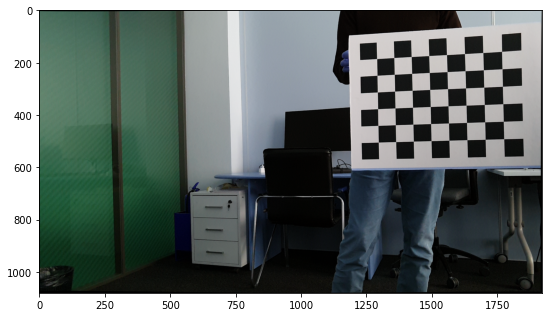

In [11]:
calib_name = 's10'
output_calib_results(intrinsics, dist_coeff, shape, images, 0, calib_name)